<h1>Projekt "Saxophone"<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Aufgabe" data-toc-modified-id="Aufgabe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aufgabe</a></span></li><li><span><a href="#Aufgabe" data-toc-modified-id="Aufgabe-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Aufgabe</a></span></li><li><span><a href="#Aufgabe" data-toc-modified-id="Aufgabe-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Aufgabe</a></span></li><li><span><a href="#Aufgabe" data-toc-modified-id="Aufgabe-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aufgabe</a></span></li><li><span><a href="#Zusatzaufgabe" data-toc-modified-id="Zusatzaufgabe-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Zusatzaufgabe</a></span></li></ul></div>

In [ ]:
import os

# Target directory
target_dir = "Project-Saxophone"

# Get the current working directory's name
current_dir_name = os.path.basename(os.getcwd())

# Change directory only if not already in it
if current_dir_name != target_dir:
    if os.path.isdir(target_dir):
        os.chdir(target_dir)
        print(f"Changed into '{target_dir}' directory.")
    else:
        print(f"Directory '{target_dir}' does not exist.")
else:
    print(f"Already in '{target_dir}' directory.")

# Lernziele
Die Studierenden lernen
- akustische Signale mithilfe von Fourier-Reihen zu analysieren
- numerische Näherungswerte für Integrale mithilfe der Sehnentrapezregel zu ermitteln
- numerische Näherungswerte für Fourier-Koeffizienten zu berechnen
- periodische Funktionen durch trigonometrische Polynome zu approximieren
- Spektren zu erstellen

# Aufgabenstellung
Die abgebildete Grafik zeigt den zeitlichen Verlauf der Luftdruckveränderung eines akustischen Signals, das durch ein Saxophon erzeugt wurde.
Das Ziel dieses Projektes ist es, dieses Audiosignal mithilfe von Fourier-Reihen zu analysieren und entsprechende Methoden in Python zu implementieren.  

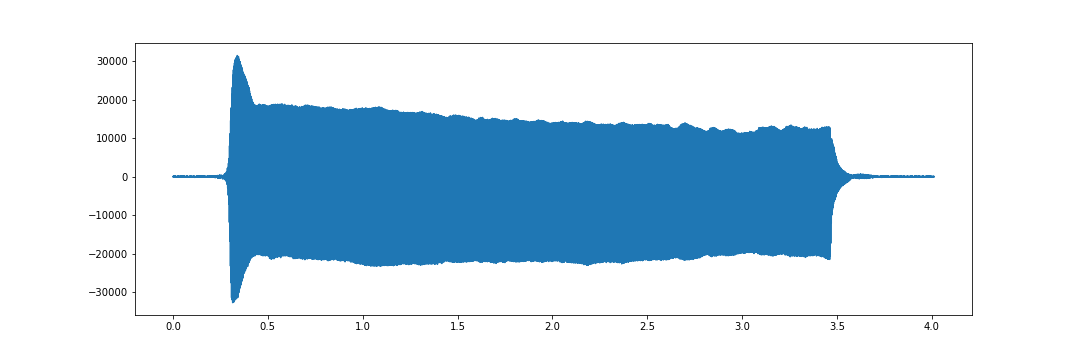

Über die Dauer von ca. $4$ Sekunden wurde die Veränderung des Luftdrucks mit einer Abtastrate von $44 \, 100$ äquidistanten Zeitwerten pro Sekunde erfasst.
Diese Auflösung wird als CD-Qualität bezeichnet.
Die physikalische Einheit des Luftdrucks ist ein Pascal, $1$ Pa.
Bei der digitalen Aufzeichnung von Musik ist es üblich, den Luftdruck entweder durch ganzzahlige Werte oder durch Gleitkommazahlen in einem normalisierten Bereich darzustellen.
Die Genauigkeit der Darstellung ist durch die Anzahl der Bit pro Abtastwert festgelegt.
In CD-Qualität verwendet man $16$ Bit, bei DVD oder Blu-Ray bis zu $24$ Bit.
Der Abbildung liegen ganze Zahlen zwischen $–32\,768$ und $32\,767$ zugrunde.
Das entspricht dem Wertebereich von `int16` und somit der CD-Qualität.

# Bibliotheken
Für die Berechnungen wird die Bibliothek `numpy` verwendet.
Das Erstellen der Grafiken erfolgt mit der Bibliothek `matplotlib` und `pyplot`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Vorgehensweise
Die Vorgehensweise kann in den folgenden Schritten erfolgen:
- WAVE-Datei mit Audiodaten
- Grafische Darstellung der Audiodaten
- Summierte Sehnentrapezregel
- Fourier-Koeffizienten
- Fourier-Reihe
- Spektrum

# WAVE-Datei mit Audiodaten
Audiosignale können in unterschiedlichen digitalen Dateiformaten gespeichert werden.
Wir verwenden in diesem Projekt das
<a href="https://de.wikipedia.org/wiki/RIFF_WAVE">Waveform Audio File Format (WAVE)</a>.
Dateien in diesem Format haben die Dateiendung `.wav`.
Die Datei `saxophone.wav` enthält die Daten des in der Abbildung dargestellten Audiosignals.
Es handelt sich um eine Mono-Aufnahme, d.h. gespeichert ist nur ein Kanal.
In Python gibt es mehrere Pakete zum Lesen, Bearbeiten und Schreiben von Audiodateien.
In diesem Projekt verwenden wir die Bibliothek `wave`.

In [ ]:
import wave

with wave.open('saxophone.wav', 'rb') as wav_file:
    n_channels = wav_file.getnchannels()
    framerate = wav_file.getframerate()
    n_frames = wav_file.getnframes()
    framebuffer = wav_file.readframes(n_frames)

frames = np.frombuffer(framebuffer, dtype=np.int16)

print("Frame Rate = ",framerate,"1/s")
print("Number of Audio Frames = ",len(frames))
print("Data Size = ",len(frames)*16/8,"Bytes")
print("Duration = ",len(frames)/framerate,"s")

Die Audiowiedergabe der Daten kann durch die Funktion `IPython.display.Audio()` erfolgen:

In [ ]:
from IPython.display import Audio
Audio(data=frames,rate=framerate)

# Grafische Darstellung der Audiodaten
Für die grafische Darstellung des Luftdrucks über der Zeit benötigen wir die zu den Audiodaten passenden Zeitwerte.
Diese ergeben sich aus der Anzahl der Audioframes und der Abtastrate. 

In [ ]:
times = np.arange(len(frames))/framerate
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(times,frames)
#fig.savefig("saxophone_1.png")

Wenn man sich das Audiosignal genauer anschaut, dann erkennt man, dass sich die Werte nach einem kurzen Einschwingvorgang über einen längeren Zeitraum periodisch wiederholen:

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(times[50000:50400],frames[50000:50400])
ax.grid(True)
#fig.savefig("saxophone_2.png")

Für die Fourier-Analyse verwenden wir die Werte einer vollen Periode $T$:

In [ ]:
p = 128
T = p/framerate
t0 = 50011
t = times[t0:t0+p+1]
f = frames[t0:t0+p+1]
ax.plot(t,f,'.r')
display(fig)
#fig.savefig("saxophone_3.png")

Aus der Skizze ist zu erkennen, dass eine volle Periode aus insgesamt $128$ Werten besteht.
Somit gilt für die Periode $T$:

$$
	T \approx \frac{128}{44\,100} \mathrm{ s},
$$

was einer Grundfrequenz von ungefähr $345$ Hz entspricht.

Die Abtastwerte einer vollen Periode charakterisieren den Ton des Saxophons und bilden die Grundlage für die Fourier-Analyse.

Die Addition von zwei Audiowerten könnte beim Datentyp `int16` einen Overflow oder Underflow des Wertebereichs verursachen.
Für die weiteren numerischen Berechnungen ist der Datentyp `int16` ungeeignet.
Deshalb konvertieren wir die Daten in den Typ `float`.

In [ ]:
f = f.astype(float)

# Summierte Sehnentrapezregel
Die Fourier-Analyse basiert auf den Fourier-Koeffizienten des periodischen Audiosignals. 
Das Audiosignal liegt in unserem Beispiel nicht in der Form einer mathematischen Funktionsvorschrift vor, sondern in der Form von abgetastenen Werten.
Die Fourier-Koeffizienten können deshalb nur numerisch angenähert und nicht mithilfe von Integralen analytisch exakt bestimmt werden.
Ein einfaches und effizientes numerisches Integrationsverfahren ist die summierte Sehnentrapezregel.
Bei diesem Verfahren wird das bestimmte Integral $I$ einer Funktion $f$ im Intervall $[a,b]$

$$
	I = \int_a^b f(x) \, \textrm{d} \, x
$$

durch eine Summe von $n$ Trapezflächen angenähert.

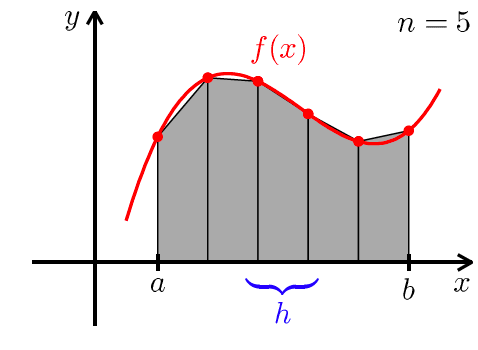

Die Fläche eines einzelnen Trapezes berechnet sich aus dem Produkt der Grundseite und dem Mittelwert der beiden Funktionswerte.
Somit lautet die Formel zur Berechnung der Summe von $n$ Trapezflächen: 

$$
	\tilde{I} = \sum_{k=0}^{n-1} (x_{k+1}-x_k) \frac{f_k + f_{k+1}}{2} \, .
$$

Dabei sind

$$
    a = x_0, x_1, x_2, \ldots , x_{n-1}, x_n = b
$$

die $x$-Koordinaten in aufsteigend sortierter Reihenfolge und

$$
    f_0, f_1, f_2, \ldots , f_{n-1}, f_n
$$

die entsprechenden Funktionswerte.

Bei einer konstanten Abtastrate, wie in unserem Beispiel, hat die Differenz aufeinanderfolgender $x$-Werte einen konstanten Wert $h$.
Die Genauigkeit des Näherungswertes hängt also im Wesentlichen von der Abtastrate ab.

<div class="alert alert-block alert-info">

### Aufgabe

**a)**
Implementieren Sie die summierte Sehnentrapezregel mit der Funktion `trapezoidalRule(x,f)` in Python.
Gehen Sie davon aus, dass $x$ und $f$ eindimensionale `numpy` Arrays gleicher Länge sind und dass die $x$-Werte aufsteigend sortiert sind.  

**b)** 
Testen Sie die Implementierung mit dem Integral
    
$$
	I = \int_1^2 \frac{1}{x} \, \textrm{d} \, x \, ,
$$

für $1000$ Abtastwerte und berechnen Sie die Abweichung des Näherungswertes vom exakten Wert $I$.
</div>

In [ ]:
#
# a) Implementation
#
def trapezoidalRule(x,f):
    '''
    Returns the trapezoidal rule for approximating integrals.

            Parameters:
                    x (np.array): sorted x values
                    f (np.array): function values

            Returns:
                    I : trapezoidal rule
    '''    
    if x.shape != f.shape:
        raise ValueError("Arrays must have the same size")
    
    I = 0

    
    
    return I

In [ ]:
#
# b) Testing
#





# Fourier-Koeffizienten
Die Fourier-Koeffizienten $a_k$ und $b_k$ einer Funktion $f$ mit Periode $T$ und Kreisfrequenz
$\omega = \frac{2 \, \pi}{T}$ kann man mit den folgenden Formeln berechnen:

$$
	\begin{array}{lcll}
	a_k & = & \displaystyle \frac{2}{T} \int_0^T f(t) \, \cos(k \, \omega \, t) \, \textrm{d} \, t, & k = 0,1,2,\ldots, n, \\
	& & & \\
	b_k & = & \displaystyle \frac{2}{T} \int_0^T f(t) \, \sin(k \, \omega \, t) \, \textrm{d} \, t, & k = \hphantom{0,} 1,2,\ldots, n.
	\end{array}
$$

Bei diesem Projekt verwenden wir an äquidistanten Zeitpunkten abgetastete Werte über eine volle Periode.
Dadurch können die Integrale mithilfe der summierten Sehnentrapezregel angenähert werden.

<div class="alert alert-block alert-info">

### Aufgabe

**a)**
Implementieren Sie die Funktion `fourierCoeffs(t,f,n=10)` in Python.
Diese Funktion soll die Fourier-Koeffizienten $a_0$, $a_1$, $\ldots$, $a_n$ und $b_1$, $\ldots$, $b_n$ mithilfe der Funktion `trapezoidalRule(x,f)` annähern.
Gehen Sie davon aus, dass $t$ und $f$ eindimensionale `numpy` Arrays gleicher Länge sind und dass die $t$-Werte aufsteigend sortiert sind.

**b)** 
Testen Sie die Implementierung für die Abtastwerte einer vollen Periode des Audiosignals des Saxophons für $n=10$.
    
<b>Kontrollwerte:</b>
    
$$
a_0 \approx 101, \quad a_1 \approx 8184, \quad b_1 \approx -6302.
$$
</div>

<div class="alert alert-block alert-danger">
    
<b>Merke</b>
    
Arrays der Bibliothek `numpy` lassen sich durch den Operator `*` elementweise multiplizieren.

- https://numpy.org/doc/stable/reference/generated/numpy.multiply.html

In [ ]:
#
# a) Implementation
#
def fourierCoeffs(t,f,n=10):
    '''
    Returns the Fourier coefficients of a periodic signal.

            Parameters:
                    t (np.array): sorted t values
                    f (np.array): function values
                    n (int): order

            Returns:
                    a : a_0, a_1, ..., a_n
                    b : 0  , b_1, ..., b_n
    '''    
    
    
    
    
    
    
    
    
    
    return a,b

In [ ]:
#
# b) Testing
#






# Fourier-Reihen

Aus den Fourier-Koeffizienten $a_k$ und $b_k$ erhält man das trigonometrische Polynom vom Grad $n$

$$
	p_n(t) = \frac{a_0}{2} + 
	\sum_{k=1}^{n} \left( a_k \cos{(k \, \omega \, t)} + b_k \sin{(k \, \omega \, t)} \right) \, .
$$

Eine Funktion soll so implementiert werden, dass das trigonometrische Polynom für beliebige reelle Zahlen $t$ ausgewertet werden kann.
Dazu wird der Funktionswert $p_n(t)$ für alle $t$-Werte mit dem Gleichanteil $\frac{a_0}{2}$ initialisiert.
Danach werden in einer Schleife alle weiteren harmonischen Schwingungen addiert.

<div class="alert alert-block alert-info">

### Aufgabe

**a)**
Implementieren Sie die Funktion `fourierSeries(a,b,t,T)` in Python.
Diese Funktion soll die Fourier-Reihe einer Funktion mit der Periode $T$ und den Fourier-Koeffizienten in den `numpy` Arrays $a$ und $b$ an allen Werten im `numpy` Array $t$ auswerten. 
Gehen Sie davon aus, dass $a$ und $b$ eindimensionale `numpy` Arrays gleicher Länge sind und dass die $t$-Werte aufsteigend sortiert sind.
Die Periode $T$ ist ein optionales Argument, das per default auf die Differenz des letzten und des ersten $t$-Wertes gesetzt wird.

**b)** 
Testen Sie die Implementierung für die Fourier-Koeffizienten der Abtastwerte einer vollen Periode des Audiosignals des Saxophons für $n=10$.
Vergleichen Sie die Abtastwerte mit der Fourier-Reihe mithilfe einer Grafik.  

</div>

Die Qualität der Annäherung einer periodischen Funktion durch trigonometrische Polynome hängt von der Abtastrate und der Ordnung $n$ ab.
In der Grafik ist zu erkennen, dass das trigonometrische Polynom für $n=10$ eine gute Näherung liefert. 

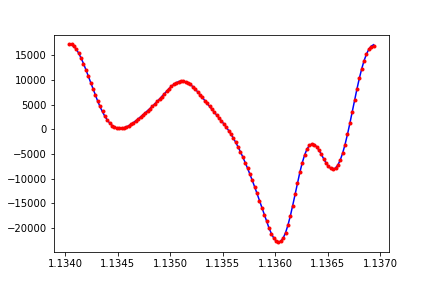

In [ ]:
#
# a) Implementation
#
def fourierSeries(a,b,t,T=-1.0):
    
    if T == -1.0:
        T = t[-1] - t[0]
    
    
    
    
    return p

In [ ]:
#
# b) Testing
#





# Spektrum

Anhand des Amplitudenspektrums

$$
	A_0 = |a_0|, \quad A_k = \sqrt{a_k^2 + b_k^2}, \, k=1,2,\ldots,n
$$

werden die Anteile der einzelnen Frequenzen $T_k=\frac{1}{k}$ sichtbar.


<div class="alert alert-block alert-info">

### Aufgabe

**a)**
Implementieren Sie die Funktion `fourierSpectrum(a,b,T)` in Python.
Diese Funktion soll das Amplitudenspektrum einer Fourier-Reihe einer Funktion mit der Periode $T$ und den Fourier-Koeffizienten in den `numpy` Arrays $a$ und $b$ berechnen. 
Gehen Sie davon aus, dass $a$ und $b$ eindimensionale `numpy` Arrays gleicher Länge sind.

**b)** 
Testen Sie die Implementierung für die Fourier-Koeffizienten der Abtastwerte einer vollen Periode des Audiosignals des Saxophons für $n=10$.
Erstellen Sie einen Bar-Plot des Amplitudenspektrums.  

</div>

Aus der Abbildung ist zu erkennen, dass der Gleichanteil des Audiosignals fast null ist.
Die Grundschwingung liegt bei einer Frequenz von ungefähr $345$ Hz.


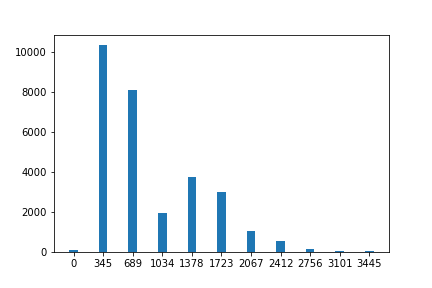

Es gibt einige kostenlose Tools um Audiosignale zu analysieren beispielsweise die Internetseite https://academo.org/demos/spectrum-analyzer/ oder die Smartphone App https://spectroid.de.aptoide.com/app.

In [ ]:
#
# a) Implementation
#
def fourierSpectrum(a,b,T):
    
    
    
    return frequencies, amplitudes

In [ ]:
#
# b) Testing
#





# Zusatzaufgabe
Das Lösen der Zusatzaufgabe erfordert fundierte Kenntnisse im Umgang mit Python.
Die Zusatzaufgabe ist nur für diejenigen gedacht, die aus eigenem Interesse tiefer in die Materie einsteigen wollen!

<div class="alert alert-block alert-info">
    
### Zusatzaufgabe

Erstellen Sie Wave-Dateien mit Fourier-Reihen des Audiosignals des Saxophons.
Berücksichtigen Sie dabei unterschiedliche Oberschwingungen, d.h. unterschiedliche Werte für $n$.
    
</div>